In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
results = pd.read_csv('outputs/all_results.csv')

In [3]:
results['chars'] = results.apply(lambda row: f"{row['min_chars']}_{row['max_chars']}", axis=1)

In [4]:
# gpt-3.5-turbo-0125 performed poorly only recalling 40 studies so we are excluding it
results[results.model_name == 'gpt-3.5-turbo-0125']

results = results[results.model_name != 'gpt-3.5-turbo-0125']

In [5]:
results.model_name.unique()

array(['firefunction-v1', 'gpt-4o-2024-05-13', 'gpt-3.5-turbo-0613',
       'gpt-4-0125-preview', 'gpt-3.5-turbo-1106'], dtype=object)

### Zero Shot
#### Participant Count

In [6]:
# Zero shot
zero_shot_count = results[(results.task == 'demographics-zeroshot') & (results.variable == 'count')]

In [7]:
zero_shot_count[['model_name', 'chars', 'n_studies']]

,model_name,chars,n_studies
90,firefunction-v1,2000_30000,264
100,firefunction-v1,40_4000,264
120,gpt-3.5-turbo-0613,40_4000,264
130,gpt-3.5-turbo-1106,2000_30000,203
140,gpt-3.5-turbo-1106,40_4000,233
150,gpt-4-0125-preview,2000_30000,259
160,gpt-4-0125-preview,40_4000,261
170,gpt-4-0125-preview,40_body,260
180,gpt-4o-2024-05-13,2000_30000,261
190,gpt-4o-2024-05-13,40_4000,253


GPT-4o responds slightly less frequently, missing around 11 papers

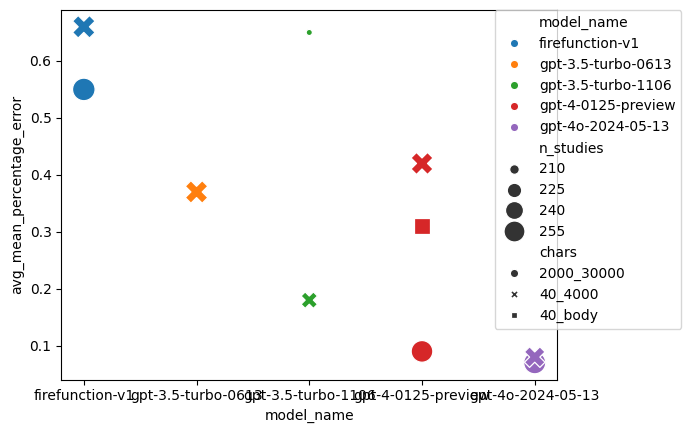

In [8]:
g = sns.scatterplot(data=zero_shot_count, x='model_name', y='avg_mean_percentage_error', hue='model_name', size='n_studies', 
                    style='chars', sizes=(20, 264))
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

Lower scores are better. 

GPT-4 performed the best, GPT-3.5 somewhat similarly (for much less cost-- although with poorer recall, especially model 1106).

FireFunction performed worse (although still somewhat decently), with high recall.

GPT 3.5 turbo 0613 showed the best balance of performance and cost.

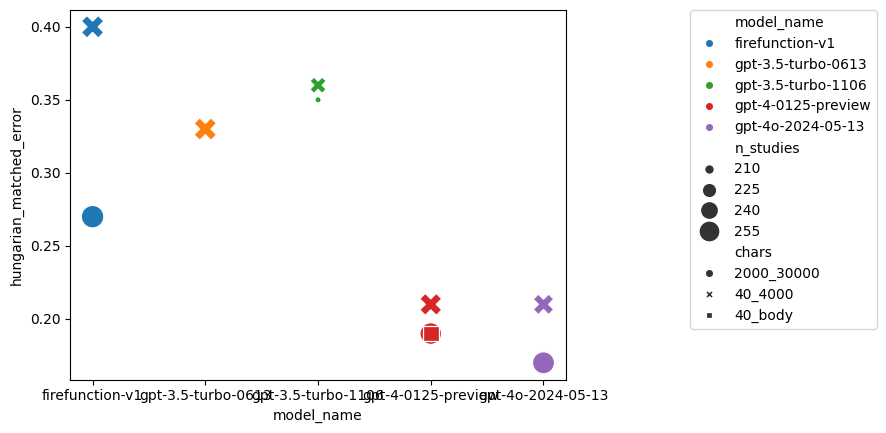

In [9]:
g = sns.scatterplot(data=zero_shot_count, x='model_name', y='hungarian_matched_error', hue='model_name', size='n_studies', 
                    style='chars', sizes=(20, 264))
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

Using Hungarian matching, we get similar results, with GPT-4 performing best

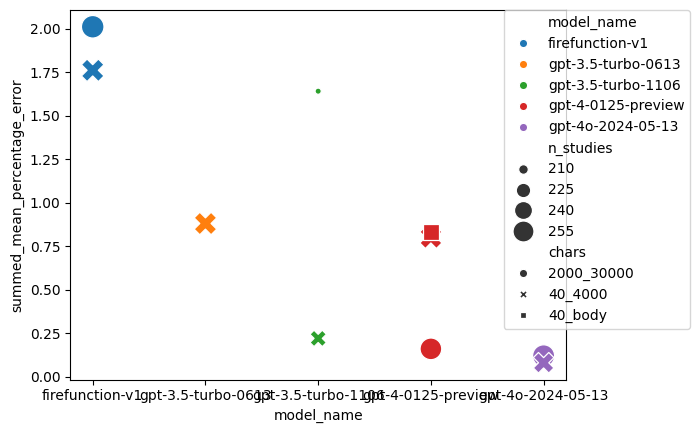

In [10]:
g = sns.scatterplot(data=zero_shot_count, x='model_name', y='summed_mean_percentage_error', hue='model_name', size='n_studies', 
                    style='chars', sizes=(20, 264))
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

Using `summed` percentage error, FireFunction does quite a bit worse, because it "over-extracts" groups. That is, instead of reporting once the value, it reports all found values in the text.

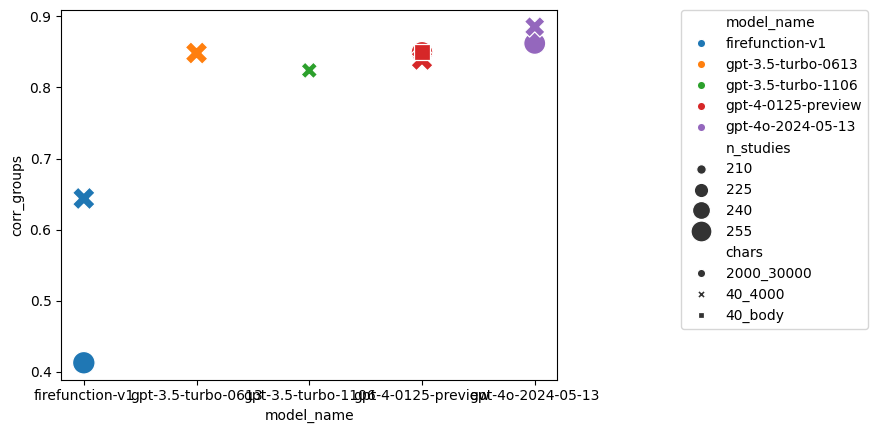

In [11]:
g = sns.scatterplot(data=zero_shot_count, x='model_name', y='corr_groups', hue='model_name', size='n_studies', 
                    style='chars', sizes=(20, 264))
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

This can be seen by plotting the percentage of times each model got the correct number of groups

##### Mean Age

In [12]:
zero_shot_age_mean = results[(results.task == 'demographics-zeroshot') & (results.variable == 'age_mean')]

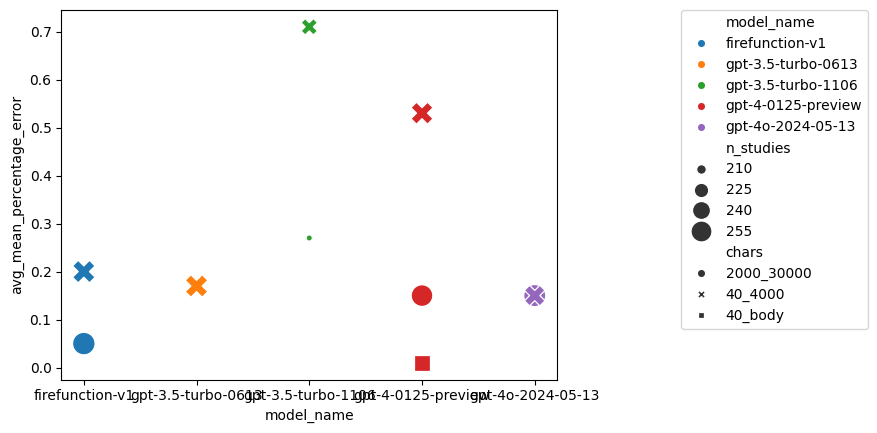

In [13]:
g = sns.scatterplot(data=zero_shot_age_mean, x='model_name', y='avg_mean_percentage_error', hue='model_name', size='n_studies', 
                    style='chars', sizes=(20, 264))
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

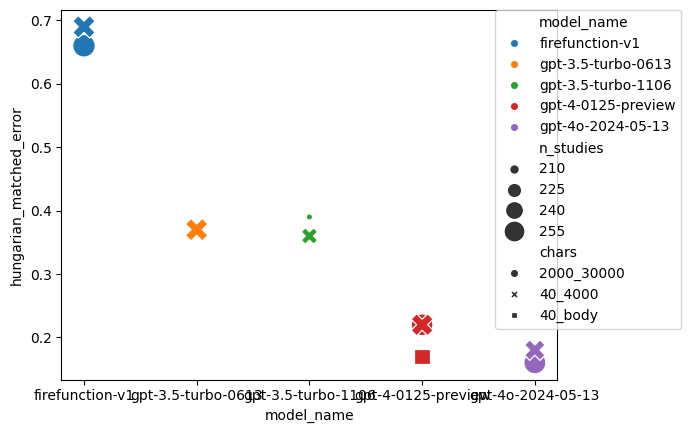

In [14]:
g = sns.scatterplot(data=zero_shot_age_mean, x='model_name', y='hungarian_matched_error', hue='model_name', size='n_studies', 
                    style='chars', sizes=(20, 264))
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

Looking at mean age, FireFunction performed reasonably well (although worse than GPT-4), although with the same problem of "over-extracting" participant groups as before. 

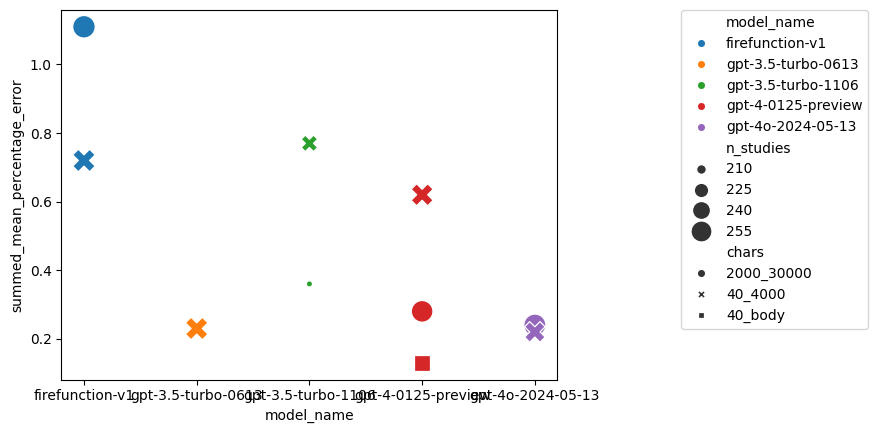

In [15]:
g = sns.scatterplot(data=zero_shot_age_mean, x='model_name', y='summed_mean_percentage_error', hue='model_name', size='n_studies', 
                    style='chars', sizes=(20, 264))
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

### Tip prompting

Motivating models with a "tip" supposedly improves performance.
We tried this w/ the FireFunction-V1 model

In [16]:
tipping = results[(results.task.isin(['demographics-tip', 'demographics-zeroshot'])) & (results.min_chars == 40) & (results.model_name == 'firefunction-v1')]

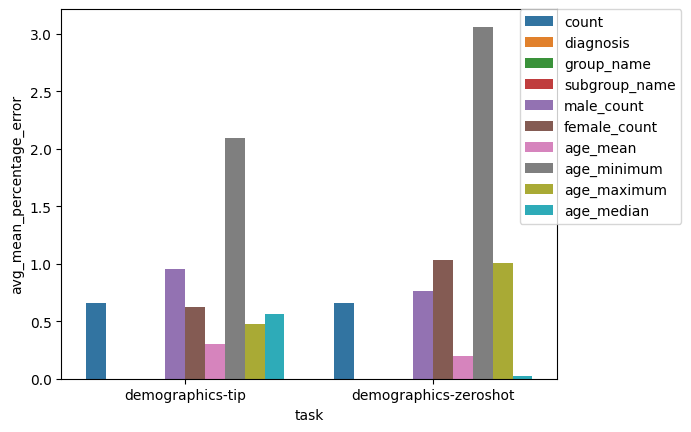

In [17]:
sns.barplot(data=tipping, x='task', y='avg_mean_percentage_error', hue='variable')
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

Across all variables, tipping reduced mean percentage error for the FireFunction model

## Few Shot Learning

In [18]:
model_names = results[(results.task == 'demographics-fewshot')].model_name.unique()

# Select comparable zero shot results

few_shot = results[
    (results.task.isin(['demographics-fewshot', 'demographics-zeroshot'])) & \
    (results.model_name.isin(model_names)) & \
    (results.chars == '40_4000')
    ]
few_shot = few_shot[few_shot.variable.isin(['count', 'age_mean', 'age_maximum', 'male_count'])]

In [19]:
few_shot[(few_shot.task == 'demographics-fewshot')]

# GPT 4o was slightly less likely to respond than other models, but not by much (257/264 studies for count)

,variable,hungarian_matched_error,counts,avg_mean_percentage_error,summed_mean_percentage_error,n_studies,task,model_name,min_chars,max_chars,corr_groups,more_groups,less_groups,chars
30,count,0.44,1.00,0.21,0.40,263,demographics-fewshot,firefunction-v1,40,4000,0.699620,0.197719,0.102662,40_4000
34,male_count,0.66,0.99,0.18,0.39,263,demographics-fewshot,firefunction-v1,40,4000,0.699620,0.197719,0.102662,40_4000
36,age_mean,0.65,0.99,0.11,0.34,263,demographics-fewshot,firefunction-v1,40,4000,0.699620,0.197719,0.102662,40_4000
38,age_maximum,0.70,0.99,0.70,0.94,263,demographics-fewshot,firefunction-v1,40,4000,0.699620,0.197719,0.102662,40_4000
40,count,0.45,1.00,0.56,1.41,236,demographics-fewshot,gpt-3.5-turbo-0613,40,4000,0.631356,0.288136,0.080508,40_4000
44,male_count,0.51,0.83,0.96,2.56,236,demographics-fewshot,gpt-3.5-turbo-0613,40,4000,0.631356,0.288136,0.080508,40_4000
46,age_mean,0.45,0.88,0.30,0.67,236,demographics-fewshot,gpt-3.5-turbo-0613,40,4000,0.631356,0.288136,0.080508,40_4000
48,age_maximum,0.44,0.56,0.29,0.74,236,demographics-fewshot,gpt-3.5-turbo-0613,40,4000,0.631356,0.288136,0.080508,40_4000
50,count,0.27,1.00,0.14,0.25,260,demographics-fewshot,gpt-4-0125-preview,40,4000,0.769231,0.119231,0.111538,40_4000
54,male_count,0.30,0.96,0.11,0.19,260,demographics-fewshot,gpt-4-0125-preview,40,4000,0.769231,0.119231,0.111538,40_4000


/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


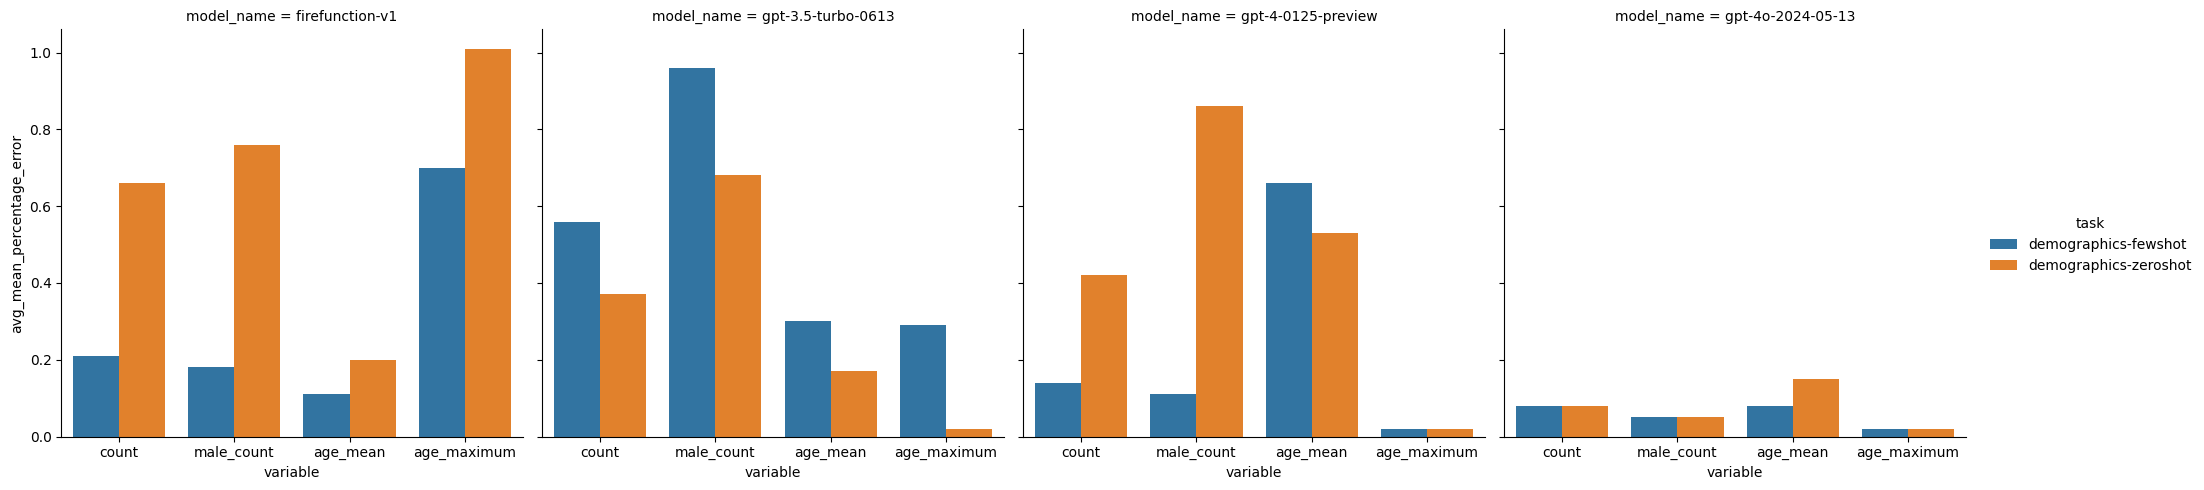

In [20]:
sns.catplot(data=few_shot, x='variable', y='avg_mean_percentage_error', kind='bar', hue='task', col='model_name', legend='full')

FireFunction and GPT-4 greatly improved with few-shot prompt, whereas GPT-3.5 actually got worse.
GPT 4o does *excellent* with few shot prompting.

/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


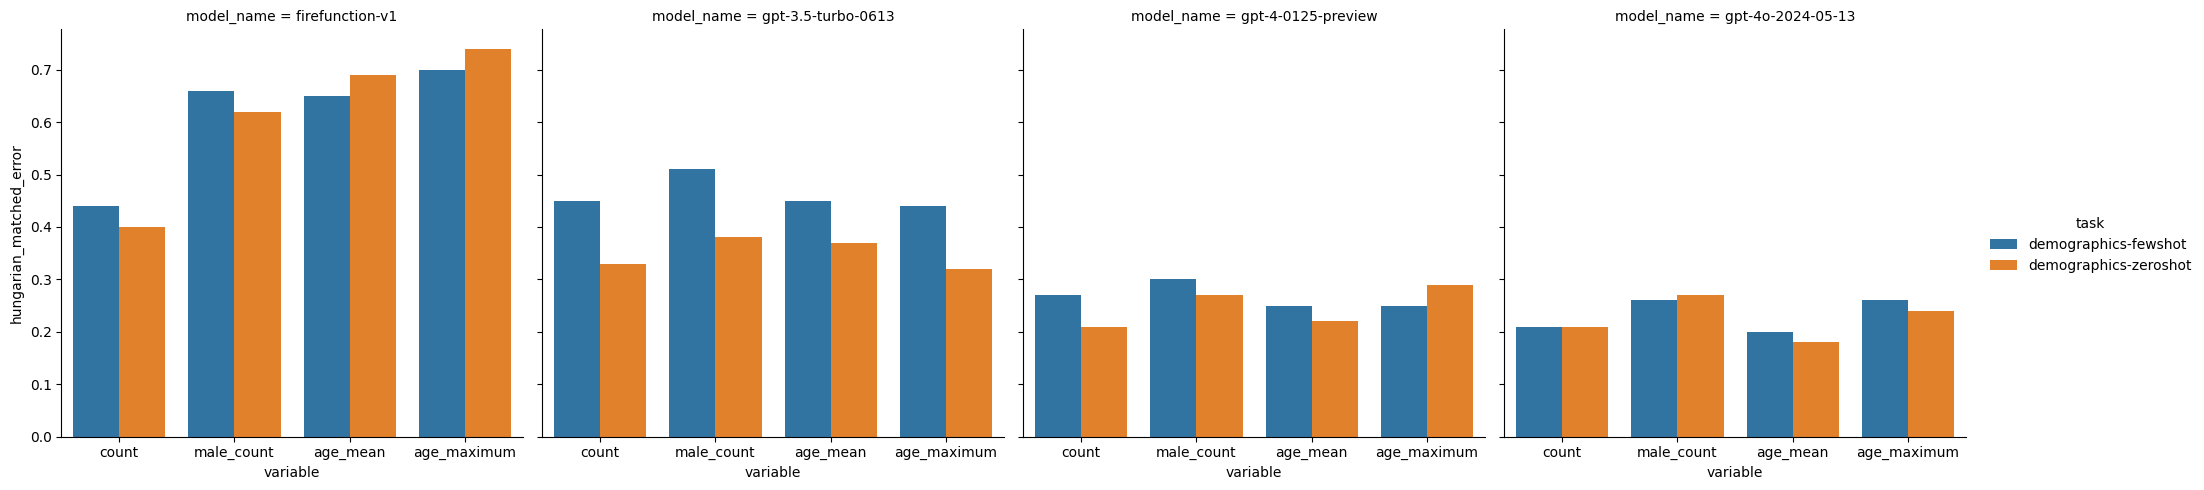

In [21]:
sns.catplot(data=few_shot, x='variable', y='hungarian_matched_error', kind='bar', hue='task', col='model_name', legend='full')

However, when looking at hungarian matched error, few shot didn't seem to help. It's unclear why. 

/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


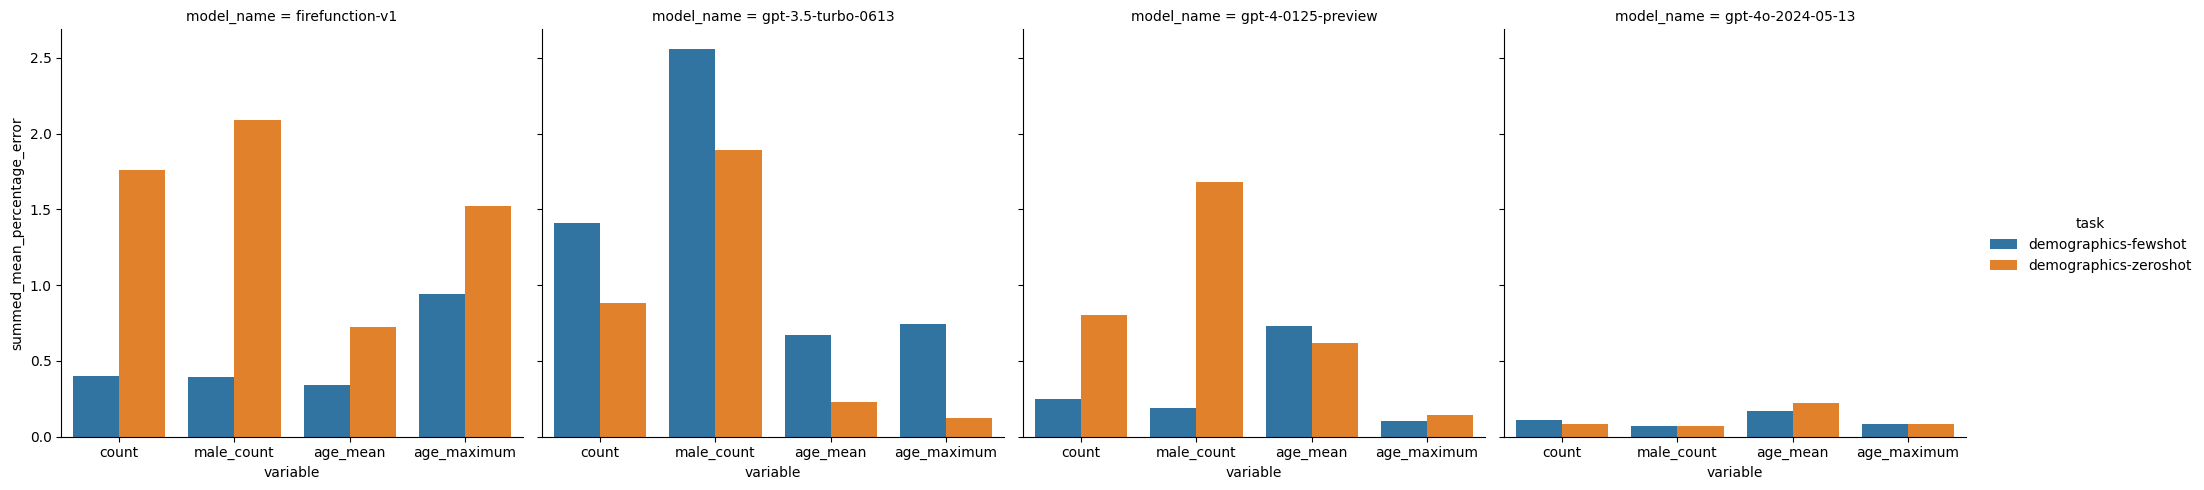

In [22]:
sns.catplot(data=few_shot, x='variable', y='summed_mean_percentage_error', kind='bar', hue='task', col='model_name', legend='full')

Overall, Firefunction performed reasonably well, even using summed percentage error. 

GPT 4o is the clear winner, however.

/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


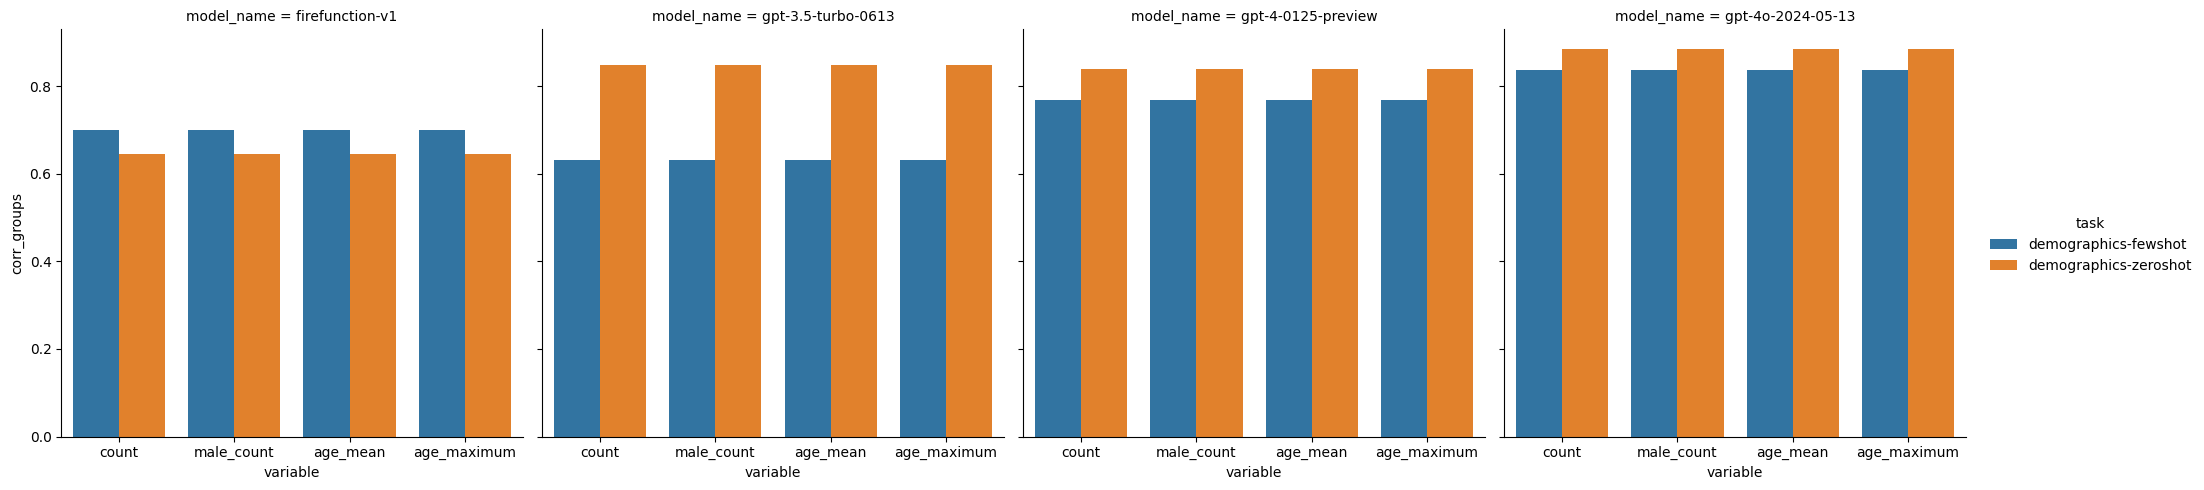

In [23]:
sns.catplot(data=few_shot, x='variable', y='corr_groups', kind='bar', hue='task', col='model_name', legend='full')

It still struggled to get the correct number of groups, which probably explains the majority of its error rate. 
GPT 4o again, excelled at this. 

#### Comparing GPT-4o context window on few shot learning

In [24]:
gpto_few_shot = results[
    (results.task == 'demographics-fewshot') & \
    (results.model_name == 'gpt-4o-2024-05-13')
    ]

/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


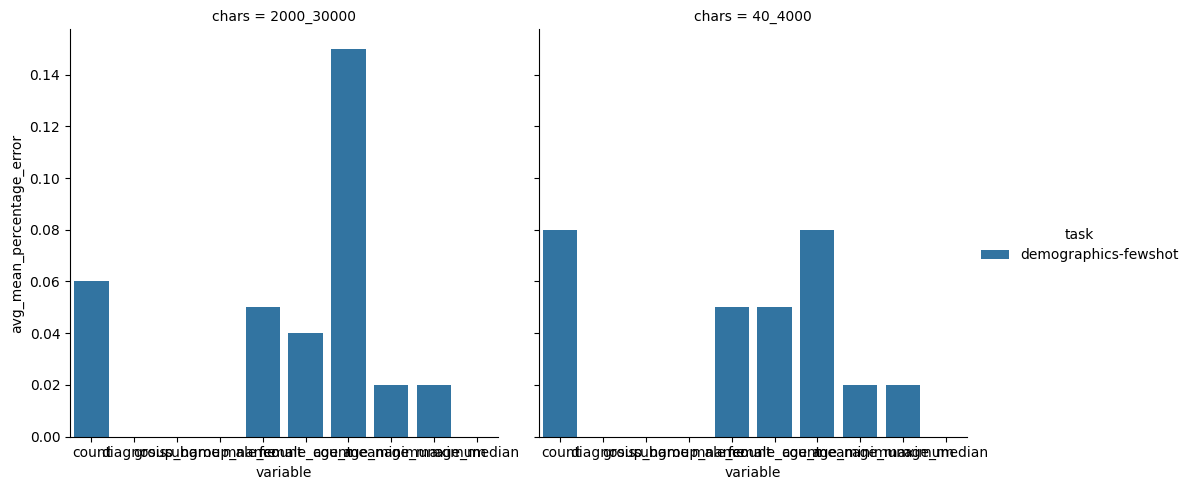

In [25]:
sns.catplot(data=gpto_few_shot, x='variable', y='avg_mean_percentage_error', kind='bar', hue='task', col='chars', legend='full')

/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


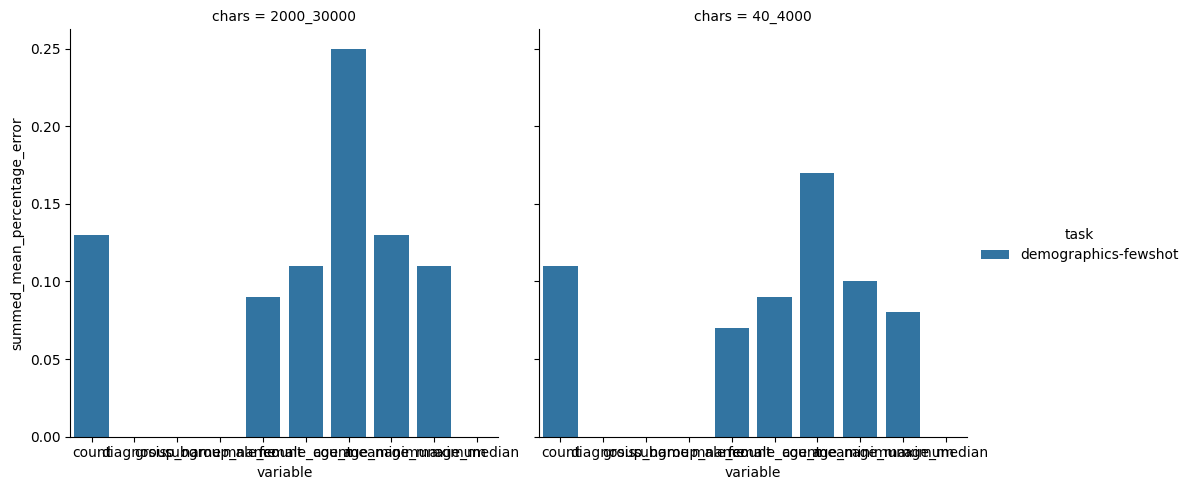

In [26]:
sns.catplot(data=gpto_few_shot, x='variable', y='summed_mean_percentage_error', kind='bar', hue='task', col='chars', legend='full')

40-4000 chars was sufficient for optimal peformance (and cheaper)

### Few Shot Learning 2

Here, we iterated on the few-shot prompt, to better identify "behavioral" samples from others by instead asking for a "assesment_type" column
We filter out behavioral samples prior to evaluation.

In [27]:
few_shot_2 = results[
    (results.task.isin(['demographics-fewshot', 'demographics-fewshot2'])) & \
    (results.model_name == 'firefunction-v1') & \
    (results.chars == '40_4000')
    ]
few_shot_2 = few_shot_2[few_shot_2.variable.isin(['count', 'age_mean', 'age_maximum', 'male_count'])]

In [28]:
few_shot_2.task.unique()

array(['demographics-fewshot2', 'demographics-fewshot'], dtype=object)

/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


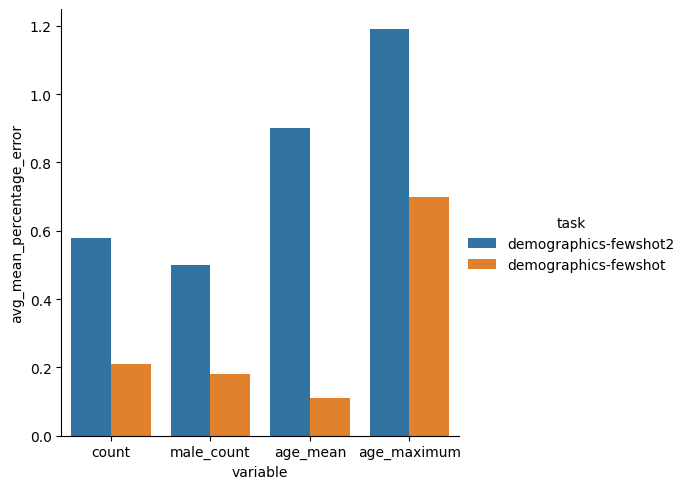

In [30]:
sns.catplot(data=few_shot_2, x='variable', y='avg_mean_percentage_error', kind='bar', hue='task', legend='full')

/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


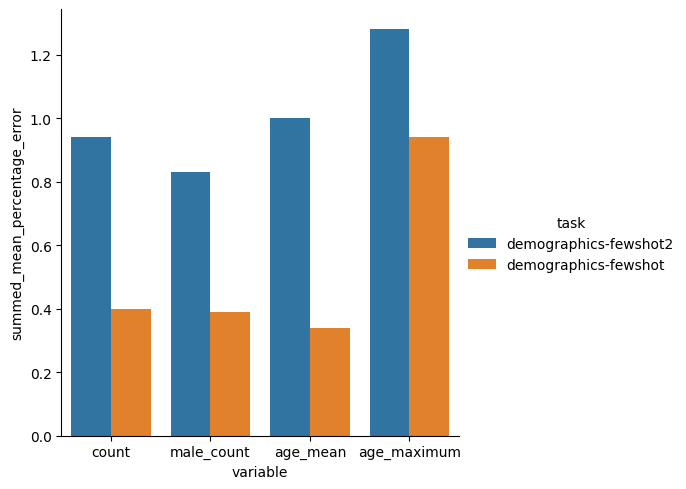

In [31]:
sns.catplot(data=few_shot_2, x='variable', y='summed_mean_percentage_error', kind='bar', hue='task', legend='full')

### GPT-4o

In [34]:
few_shot_2_gpt = results[
    (results.task.isin(['demographics-fewshot', 'demographics-fewshot2'])) & \
    (results.model_name == 'gpt-4o-2024-05-13') & \
    (results.chars == '40_4000')
    ]
few_shot_2_gpt = few_shot_2_gpt[few_shot_2_gpt.variable.isin(['count', 'age_mean', 'age_maximum', 'male_count'])]

/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


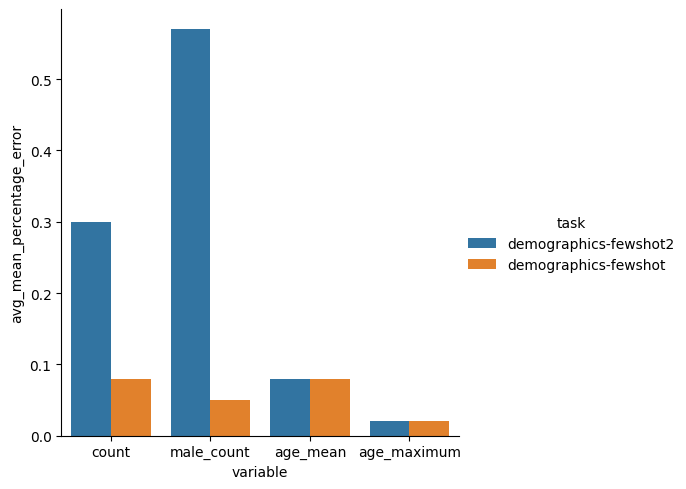

In [37]:
sns.catplot(data=few_shot_2_gpt, x='variable', y='avg_mean_percentage_error', kind='bar', hue='task', legend='full')

/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


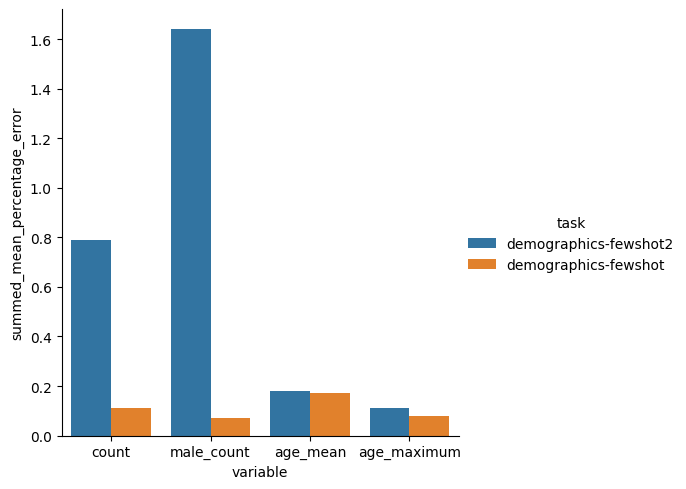

In [38]:
sns.catplot(data=few_shot_2_gpt, x='variable', y='summed_mean_percentage_error', kind='bar', hue='task', legend='full')